<a href="https://colab.research.google.com/github/suzuki-hikaru/ml-practice/blob/master/%E7%AC%AC3%E5%9B%9E%E8%AA%B2%E9%A1%8C_18118078.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ワイン品質データセットにおけるワインの種類を、以下①②の手法で分類し、それぞれのトレーニングデータの正解率と使用したパラメータを記述してください
①決定木で分類

②ランダムフォレストもしくはAdaBoost(決定木をベースとする)で分類

## <font color="red">解答欄</font>

①
- 正解率: 0.9629629629629629
- パラメータ: criterion='gini', max_depth=4



②
- 選んだアルゴリズム:　ランダムフォレスト
- 正解率: 0.9814814814814815
- パラメータ: criterion='gini',n_estimators=50,          random_state=1,n_jobs=2

<br><br><br><br><br>



### データセットの読み込み

In [ ]:
# このセルの内容は変更禁止
from sklearn import datasets
import numpy as np

# ワイン品質データセットは load_wine を読み込む
wine = datasets.load_wine()
X = wine.data
y = wine.target

### トレーニングデータ・テストデータの分割

In [ ]:
# このセルの内容は変更禁止
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

## 以下、各自で取り組んでみてください
- 解答は**解答欄に**お願いします
- [参考ノートブック](https://colab.research.google.com/drive/1wvBZCiRwLzEMZsHI0DYPCxwAjlmIy1c7?usp=sharing)を参照してみて下さい

## 下準備

In [ ]:
# 必要になるライブラリのインポート
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

In [ ]:
# 特徴量の確認
print(wine['feature_names'])
print('Class labels:', np.unique(y))

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Class labels: [0 1 2]


### ①決定木
- scikit-learnの[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)を使って下さい（アルゴリズムはCARTです）
- ※ちなみに回帰は[DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)でできます
- [動画](https://www.youtube.com/watch?v=irTbuevXauk)の24分28秒〜28分6秒を参考にしてみて下さい

In [ ]:
# このセルの内容は変更禁止
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics
from sklearn.metrics import accuracy_score

In [ ]:
# 正解率を書く（決定木）
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=4)
tree_clf.fit(X_train, y_train)

predict = tree_clf.predict(X_test)
ac_score_tree = metrics.accuracy_score(y_test,predict)
cl_report_tree = metrics.classification_report(y_test,predict)
print("正解率:" , ac_score_tree)
print("レポート:\n",cl_report_tree)

正解率: 0.9629629629629629
レポート:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.95      0.95      0.95        21
           2       1.00      1.00      1.00        15

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54



### ②ランダムフォレスト or AdaBoost
- scikit-learnの[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)か
[AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)を使って下さい<br>
- ※ちなみに回帰はそれぞれ[RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)と[AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html)でできます
- ランダムフォレストは、[動画](https://www.youtube.com/watch?v=0WcrBe017-w)16分57秒以降を参考にしてみて下さい
- AdaBoostは、[このサイト](https://www.haya-programming.com/entry/2019/04/22/183347)を参考にしてみて下さい（パラメータに関しても参考になります）

In [ ]:
# このセルの内容は変更禁止
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(criterion='gini',
                                n_estimators=50, 
                                random_state=1,
                                n_jobs=2)
forest_clf.fit(X_train, y_train)

estimator = forest_clf.estimators_[0]

predict_forest = forest_clf.predict(X_test)
ac_score_forest = metrics.accuracy_score(y_test,predict_forest)
cl_report_forest = metrics.classification_report(y_test,predict_forest)
print("正解率:" , ac_score_forest)
print("レポート:\n",cl_report_forest)

正解率: 0.9814814814814815
レポート:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



# 応用課題（もし時間に余裕があれば）
[このノートブック](https://colab.research.google.com/drive/1wvBZCiRwLzEMZsHI0DYPCxwAjlmIy1c7?usp=sharing)を参考に可視化してみて下さい<br>
1月は試験期間なので無理のない範囲で大丈夫です🙆‍♀️

In [ ]:
# 特徴量確認
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


DeepLで翻訳！！！

⇒「アルコール」、「リンゴ酸」、「灰分」、「灰分濃度」、「マグネシウム」、「総フェノール」、「フラバノイド」、「ノンフラバノイド」、「プロアントシアニン」、「色の濃さ」、「色相」、「od280/od315_of_diluted_wines」、「プロリン」(アミノ酸の一種らしい) 。

見た目だけの情報で学習するとどうなるか気になった。

「色の濃さ」、「色相」をせんたく！

In [ ]:
X=wine.data[:, [9, 10]]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
# 散布図を書くための関数
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

正解率: 0.8333333333333334
レポート:
               precision    recall  f1-score   support

           0       0.71      0.94      0.81        18
           1       0.94      0.76      0.84        21
           2       0.92      0.80      0.86        15

    accuracy                           0.83        54
   macro avg       0.86      0.84      0.84        54
weighted avg       0.86      0.83      0.84        54



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


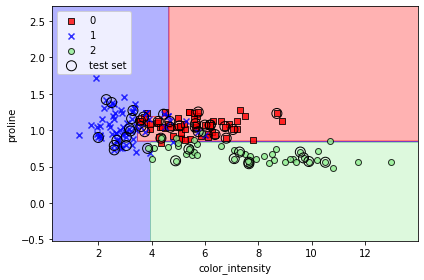

In [ ]:
tree_clf = DecisionTreeClassifier(criterion='gini',max_depth=4)
tree_clf.fit(X_train,y_train)

predict=tree_clf.predict(X_test)
ac_score_tree=metrics.accuracy_score(y_test,predict)
cl_report_tree=metrics.classification_report(y_test,predict)
print("正解率:",ac_score_tree)
print("レポート:\n",cl_report_tree)

おもっていたより低くなった。。。

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30456 missing

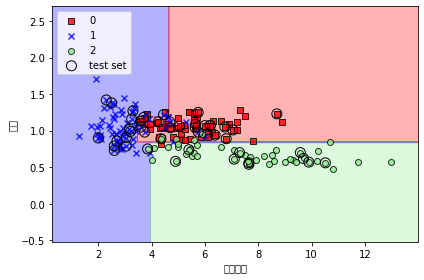

In [ ]:
# 可視化
X_combined=np.vstack((X_train,X_test))
y_combined=np.hstack((y_train,y_test))

plot_decision_regions(X_combined,y_combined,classifier=tree_clf,test_idx=range(105,150))
plt.xlabel('色の濃さ')
plt.ylabel('色相')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

これは、、、密集してるし見た目（色の濃さ、色相）だときれいに分類できなそう(T_T)

そもそも最初に可視化したら直感的にきれいに分類できるかわかりそう。可視化だいじ。猛省

日本語が□になってるのを直したい(T_T)

In [ ]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 8.7MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp36-none-any.whl size=4120276 sha256=7c6bb692eabefbe8392661794345f25e26c646fae9222187462f5729a9389ba2
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [ ]:
import japanize_matplotlib

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


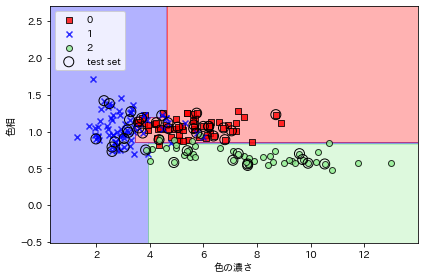

In [ ]:
# 可視化！
X_combined=np.vstack((X_train,X_test))
y_combined=np.hstack((y_train,y_test))

plot_decision_regions(X_combined,y_combined,classifier=tree_clf,test_idx=range(105,150))
plt.xlabel('色の濃さ')
plt.ylabel('色相')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()